In [1]:
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving application_test.csv to application_test.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import numpy as np
import gc
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns
import math
import pickle
import os

from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from scipy.stats import randint as sp_randint
from sklearn.model_selection import KFold, StratifiedKFold
from prettytable import PrettyTable
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.sparse import hstack
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from datetime import datetime


In [3]:
app_test = pd.read_csv('application_test.csv')


In [4]:
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [5]:
app_train = pd.read_csv('application_train.csv')


In [6]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
bureau = pd.read_csv('bureau.csv')


In [8]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [12]:
bbalance = pd.read_csv('bureau_balance.csv')


In [13]:
bbalance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [ ]:
ins_pay = pd.read_csv('installments_payments.csv')


In [ ]:
ins_pay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
1538799,1082439,171379,3.0,14,-780.0,-789.0,4360.320,4360.320
1538800,1642077,117472,0.0,31,-2028.0,-2028.0,15750.000,15750.000
1538801,1289988,120998,0.0,141,-790.0,-790.0,165.915,165.915
1538802,1220369,178152,1.0,1,-750.0,-759.0,12852.090,12852.090


In [ ]:
pos_cash = pd.read_csv('pos_cash_balance.csv')


In [ ]:
pos_cash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0.0,0.0
1,1715348,367990,-33,36.0,35.0,Active,0.0,0.0
2,1784872,397406,-32,12.0,9.0,Active,0.0,0.0
3,1903291,269225,-35,48.0,42.0,Active,0.0,0.0
4,2341044,334279,-35,36.0,35.0,Active,0.0,0.0
...,...,...,...,...,...,...,...,...
1520743,1620522,114541,-9,48.0,33.0,Active,0.0,0.0
1520744,1605194,202927,-19,36.0,24.0,Active,0.0,0.0
1520745,1646553,265384,-12,12.0,7.0,Active,0.0,0.0
1520746,2120015,235203,-9,12.0,0.0,Active,0.0,0.0


In [ ]:
pre_app = pd.read_csv('previous_application.csv')


In [ ]:
pre_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244812,2373124,225619,Consumer loans,8746.785,79596.0,79596.0,0.0,79596.0,MONDAY,12,...,Connectivity,10.0,low_normal,POS mobile without interest,NaN,NaN,NaN,NaN,NaN,NaN
244813,1163267,341594,Cash loans,23148.855,450000.0,512370.0,NaN,450000.0,TUESDAY,6,...,XNA,36.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
244814,1786419,141877,Cash loans,37469.655,675000.0,767664.0,NaN,675000.0,WEDNESDAY,13,...,XNA,48.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
244815,2479064,240581,Cash loans,46614.960,1575000.0,1762110.0,NaN,1575000.0,TUESDAY,12,...,XNA,60.0,low_action,Cash Street: low,365243.0,-1319.0,451.0,-1079.0,-1074.0,0.0


In [ ]:
samp_sub = pd.read_csv('sample_submission.csv')


In [ ]:
samp_sub

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


Number of customers who will not repay the loan on time:  9175 , ( 8.150628953166086 %)
Number of customers who will repay the loan on time:  103393 , ( 91.84937104683392 %)


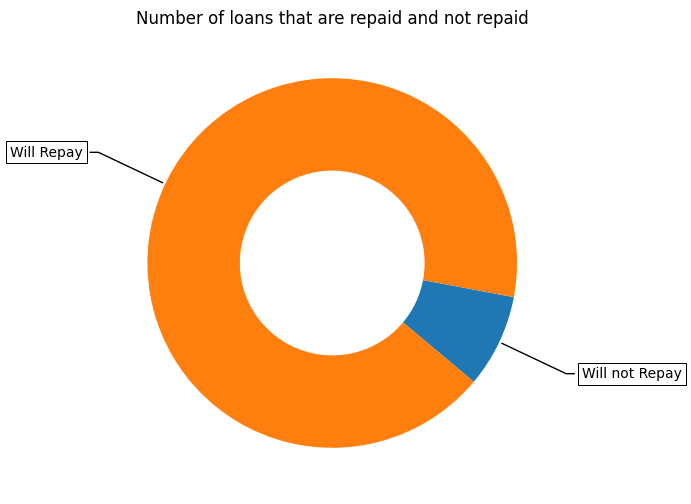

In [ ]:
y_value_counts = app_train['TARGET'].value_counts()
print("Number of customers who will not repay the loan on time: ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of customers who will repay the loan on time: ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Will not Repay", "Will Repay"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5),\
                       startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of loans that are repaid and not repaid")

plt.show()

Only 8.07% of the records are defaulters (class label 1), and the remaining
91.92% of the records correspond to non-defaulters (class label 0).

In [15]:
def stack_plot(data, xtick, col2='TARGET', col3='total'):
    ind = np.arange(data.shape[0])

    if len(data[xtick].unique())<5:
        plt.figure(figsize=(5,5))
    elif len(data[xtick].unique())>5 & len(data[xtick].unique())<10:
        plt.figure(figsize=(7,7))
    else:
        plt.figure(figsize=(15,15))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Loans')
    plt.title('Number of loans aproved vs rejected')
    plt.xticks(ticks=ind,rotation=90,labels= list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('capable', 'not capable'))
    plt.show()


def univariate_barplots(data, col1, col2='TARGET', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(app_train.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(app_train.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(app_train.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']

    temp.sort_values(by=['total'],inplace=True, ascending=False)

    if top:
        temp = temp[0:top]

    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

In [10]:
def stack_plot(data, xtick, col2='TARGET', col3='total'):
    ind = np.arange(data.shape[0])

    if len(data[xtick].unique())<5:
        plt.figure(figsize=(5,5))
    elif len(data[xtick].unique())>5 & len(data[xtick].unique())<10:
        plt.figure(figsize=(7,7))
    else:
        plt.figure(figsize=(15,15))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Loans')
    plt.title('Number of loans aproved vs rejected')
    plt.xticks(ticks=ind,rotation=90,labels= list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('capable', 'not capable'))
    plt.show()

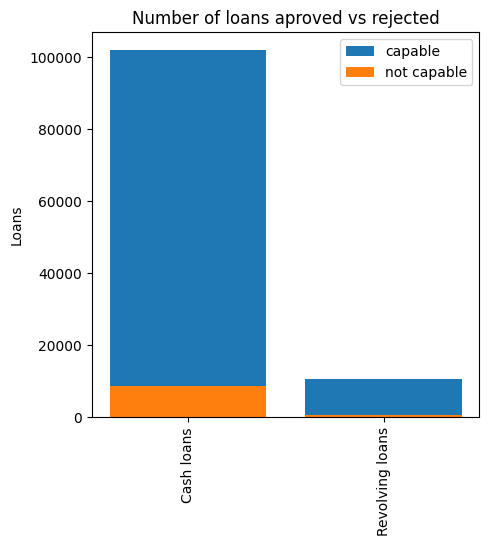

  NAME_CONTRACT_TYPE  TARGET   total       Avg
0         Cash loans    8579  101897  0.084193
1    Revolving loans     596   10671  0.055852
  NAME_CONTRACT_TYPE  TARGET   total       Avg
0         Cash loans    8579  101897  0.084193
1    Revolving loans     596   10671  0.055852


In [ ]:

univariate_barplots(app_train, col1 = 'NAME_CONTRACT_TYPE', col2='TARGET', top=False)



From this, we can observe that most of the people are taking cash loans instead of revolving loans such as Credit Cards.


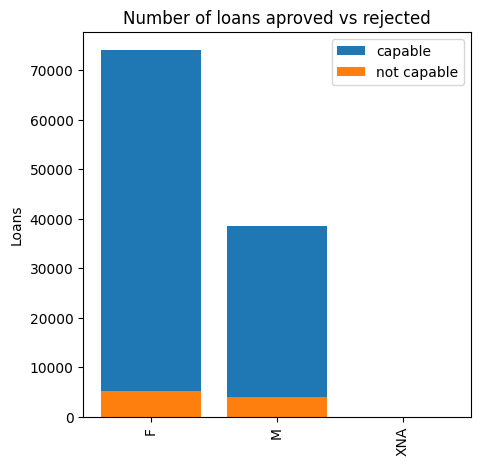

  CODE_GENDER  TARGET  total       Avg
0           F    5225  74089  0.070523
1           M    3950  38476  0.102661
2         XNA       0      3  0.000000
  CODE_GENDER  TARGET  total       Avg
0           F    5225  74089  0.070523
1           M    3950  38476  0.102661
2         XNA       0      3  0.000000


In [ ]:
univariate_barplots(app_train, col1 = 'CODE_GENDER', col2='TARGET', top=False)


The interesting part over here is the fact that Women took much more number of loans as compared to Men : Whereas Women took a total of 70K+ loans, Men only took 35K+ loans. However, at the same time, Men are slightly more capable of repaying the loan as compared to Women. Whereas Men are able to repay their loans in 10% of the cases, Women are only able to repay in 7% of the cases. There are 4 entries where Gender=’XNA’. Since this is not providing us with much information, we can remove these entries later on.

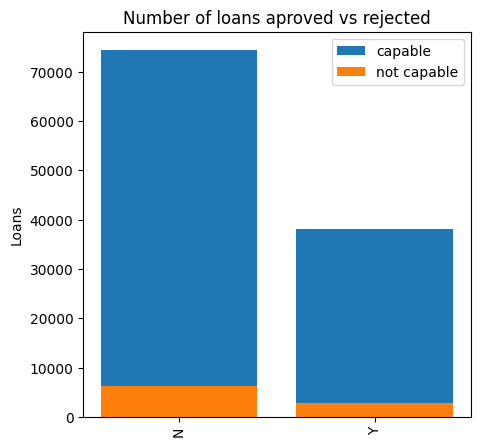

  FLAG_OWN_CAR  TARGET  total       Avg
0            N    6359  74368  0.085507
1            Y    2816  38200  0.073717
  FLAG_OWN_CAR  TARGET  total       Avg
0            N    6359  74368  0.085507
1            Y    2816  38200  0.073717


In [ ]:
univariate_barplots(app_train, col1 = 'FLAG_OWN_CAR', col2='TARGET', top=False)


Most of the applicants for loans do not own a car. However, there is not much difference in the loan repayment status for the customer based on this information (8.5% and 7.2% respectively). We can conclude that this feature is not very useful.

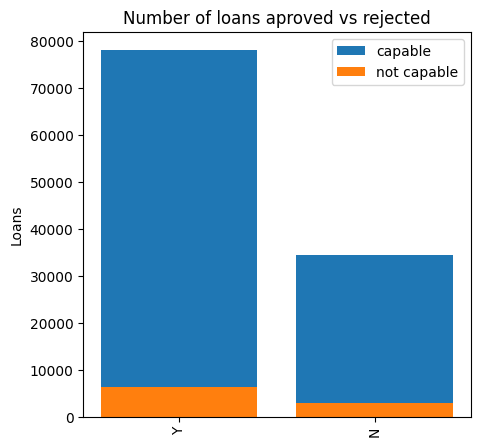

  FLAG_OWN_REALTY  TARGET  total       Avg
1               Y    6297  78095  0.080633
0               N    2878  34473  0.083486
  FLAG_OWN_REALTY  TARGET  total       Avg
1               Y    6297  78095  0.080633
0               N    2878  34473  0.083486


In [ ]:
univariate_barplots(app_train, col1 = 'FLAG_OWN_REALTY', col2='TARGET', top=False)


Most of the applicants for loans own a flat/house, which is a little surprising. However, again, there is not much difference in the loan repayment status for the customer based on this information (7.9% and 8.3% respectively). We can conclude that this feature is not very useful.

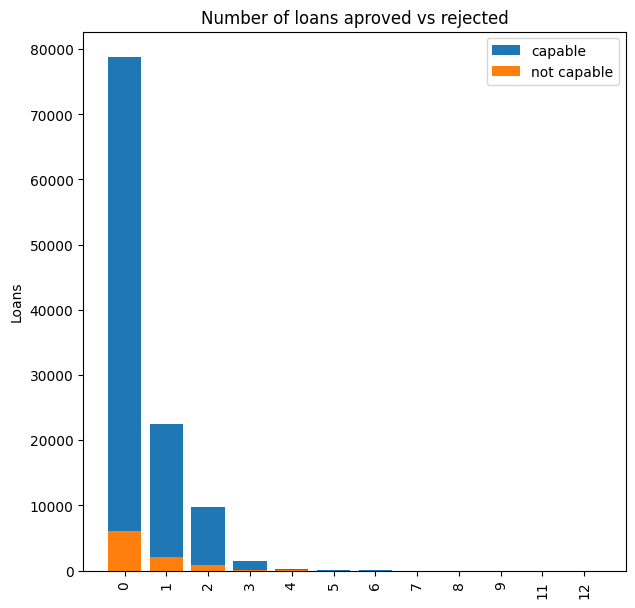

   CNT_CHILDREN  TARGET  total       Avg
0             0    6133  78744  0.077885
1             1    2039  22515  0.090562
2             2     834   9700  0.085979
3             3     137   1389  0.098632
4             4      25    171  0.146199
    CNT_CHILDREN  TARGET  total  Avg
7              7       0      2  0.0
8              8       0      1  0.0
9              9       1      1  1.0
10            11       1      1  1.0
11            12       0      1  0.0


In [ ]:
univariate_barplots(app_train, col1 = 'CNT_CHILDREN', col2='TARGET', top=False)


The applicants having no children take considerably higher number of loans. However, again, there is not much difference in the loan repayment status for the customer based on this information. We can conclude that this feature is not very useful.


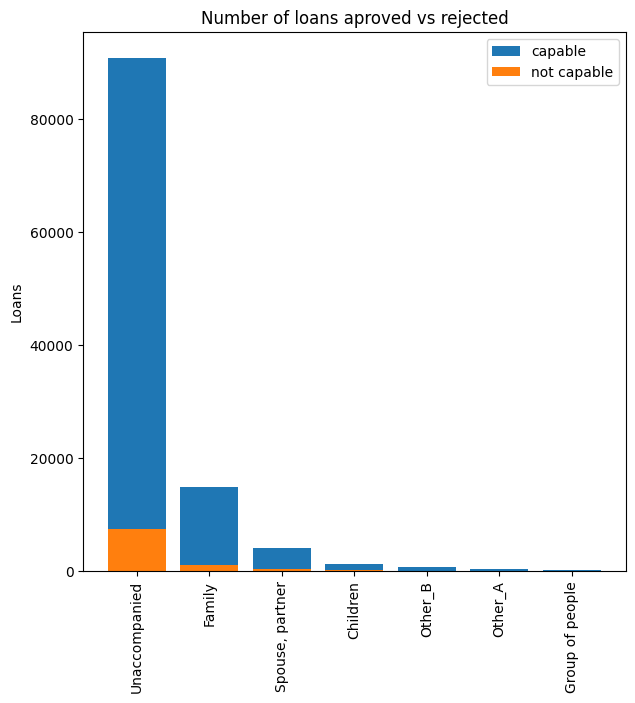

   NAME_TYPE_SUITE  TARGET  total       Avg
6    Unaccompanied    7496  90880  0.082482
1           Family    1147  14806  0.077469
5  Spouse, partner     319   4151  0.076849
0         Children     104   1225  0.084898
4          Other_B      56    633  0.088468
   NAME_TYPE_SUITE  TARGET  total       Avg
5  Spouse, partner     319   4151  0.076849
0         Children     104   1225  0.084898
4          Other_B      56    633  0.088468
3          Other_A      28    315  0.088889
2  Group of people       6    101  0.059406


In [ ]:
univariate_barplots(app_train, col1 = 'NAME_TYPE_SUITE', col2='TARGET', top=False)


For the various types of people accompanying the client for loan, the client comes unaccompanied to the bank in the most number of cases, out of which approx. 92% of the time, the bank finds the client to be capable of loan repayment whereas the remaining 8% of the time, the client is not capable of the same. Both in capability and non capability, ‘Unaccompanied’ as a class is the majority class in this case.


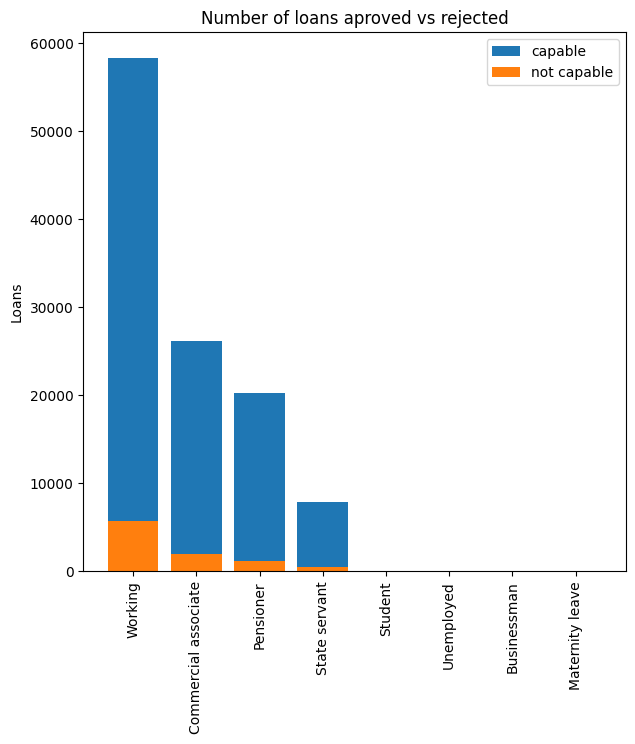

       NAME_INCOME_TYPE  TARGET  total       Avg
7               Working    5646  58324  0.096804
1  Commercial associate    1948  26149  0.074496
3             Pensioner    1112  20186  0.055088
4         State servant     465   7883  0.058988
5               Student       0     10  0.000000
  NAME_INCOME_TYPE  TARGET  total       Avg
4    State servant     465   7883  0.058988
5          Student       0     10  0.000000
6       Unemployed       4     10  0.400000
0      Businessman       0      4  0.000000
2  Maternity leave       0      2  0.000000


In [ ]:
univariate_barplots(app_train, col1 = 'NAME_INCOME_TYPE', col2='TARGET', top=False)


The people who are working take the most number of loans whereas Commercial Associates, Pensioners and State Servants take considerably lesser number of loans. We have very little datapoints related to Unemployed people, Students, Businessmen and women on Maternity leave. One interesting observation over here is the fact that whatever loans the students and businessmen have applied to, they have been deemed capable of repayment of the same.


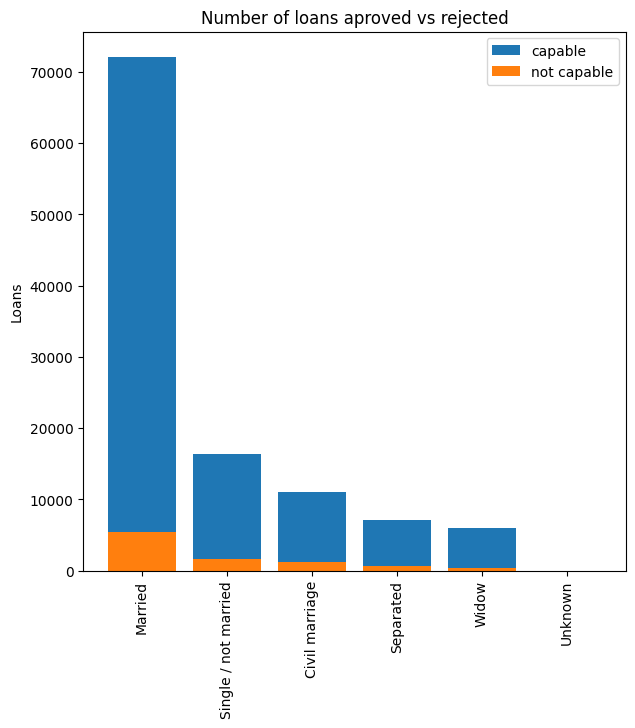

     NAME_FAMILY_STATUS  TARGET  total       Avg
1               Married    5424  72048  0.075283
3  Single / not married    1649  16413  0.100469
0        Civil marriage    1141  11049  0.103267
2             Separated     619   7156  0.086501
5                 Widow     342   5901  0.057956
     NAME_FAMILY_STATUS  TARGET  total       Avg
3  Single / not married    1649  16413  0.100469
0        Civil marriage    1141  11049  0.103267
2             Separated     619   7156  0.086501
5                 Widow     342   5901  0.057956
4               Unknown       0      1  0.000000


In [ ]:
univariate_barplots(app_train, col1 = 'NAME_FAMILY_STATUS', col2='TARGET', top=False)


There is variability among the Family Status of the applicants but there is not much variability if the majority class (Married) is ignored. Married people apply for the most number of loans and the number of people deemed incapable of repayment is also the highest.


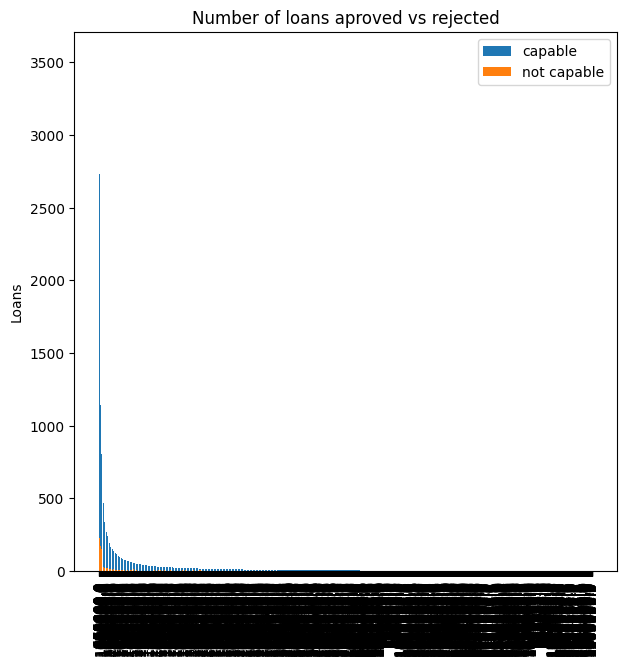

      AMT_CREDIT  TARGET  total       Avg
1152    450000.0     390   3533  0.110388
1866    675000.0     238   3234  0.073593
455     225000.0     215   3003  0.071595
328     180000.0     225   2731  0.082387
591     270000.0     161   2646  0.060847
      AMT_CREDIT  TARGET  total  Avg
3196   1183396.5       0      1  0.0
3195   1183131.0       0      1  0.0
1351    508153.5       0      1  0.0
1354    508527.0       0      1  0.0
2137    769743.0       1      1  1.0


In [ ]:
univariate_barplots(app_train, col1 = 'AMT_CREDIT', col2='TARGET', top=False)


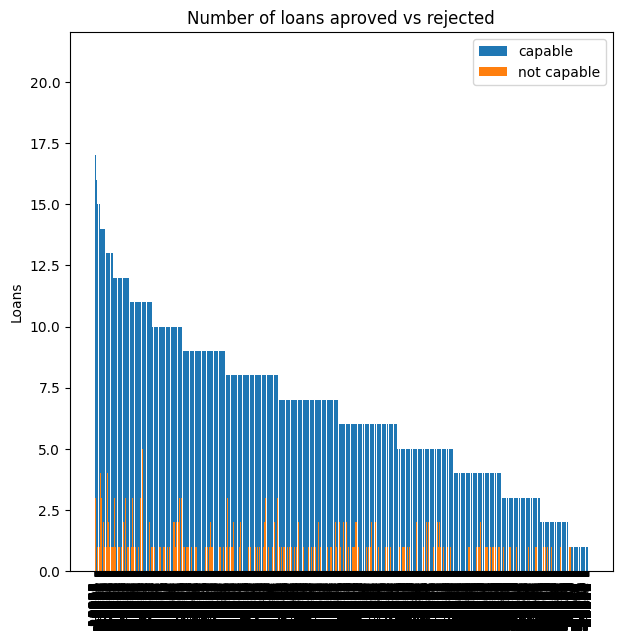

       DAYS_BIRTH  TARGET  total       Avg
10989      -13891       3     21  0.142857
9954       -14926       2     21  0.095238
13837      -11039       2     20  0.100000
6639       -18248       1     20  0.050000
14856      -10020       1     19  0.052632
       DAYS_BIRTH  TARGET  total  Avg
1489       -23411       1      1  1.0
1506       -23393       0      1  0.0
1540       -23359       0      1  0.0
1551       -23348       0      1  0.0
17055       -7676       0      1  0.0


In [ ]:
univariate_barplots(data = app_train, col1 = 'DAYS_BIRTH', col2='TARGET', top=False)


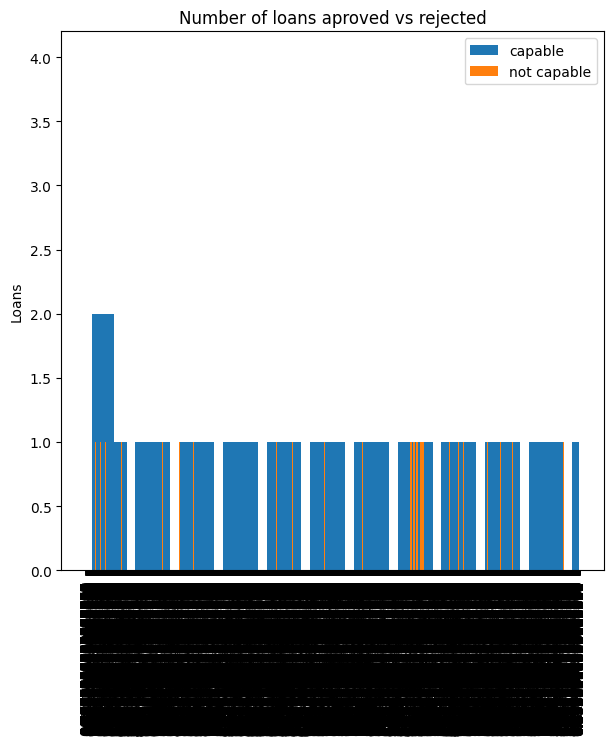

       EXT_SOURCE_1  TARGET  total   Avg
12396      0.342503       0      4  0.00
38452      0.735812       1      4  0.25
40343      0.765724       0      4  0.00
15290      0.387509       0      4  0.00
35574      0.690801       0      4  0.00
       EXT_SOURCE_1  TARGET  total  Avg
15704      0.393870       0      1  0.0
15705      0.393876       0      1  0.0
15706      0.393878       0      1  0.0
15707      0.393893       0      1  0.0
46347      0.951624       0      1  0.0


In [ ]:
univariate_barplots(data = app_train, col1 = 'EXT_SOURCE_1', col2='TARGET', top=False)


In [16]:
univariate_barplots(data = bureau, col1 = 'CREDIT_ACTIVE', col2='TARGET', top=False)


KeyError: 'CREDIT_ACTIVE'

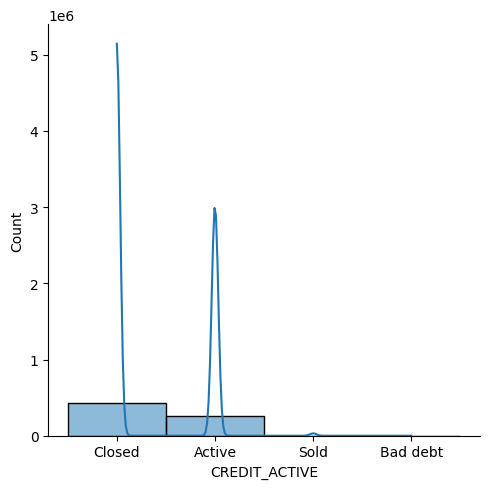

In [ ]:
sns.displot(bureau['CREDIT_ACTIVE'], kde = True, bins = 10)


In [18]:
stack_plot(data = bureau, xtick = 'CREDIT_ACTIVE', col2='TARGET')

KeyError: 'total'

<Figure size 500x500 with 0 Axes>